# 1. Import and Install Dependencies

In [ ]:
!pip install gradio mediapipe opencv-python matplotlib

In [2]:
import cv2
import mediapipe as mp
import numpy as np

# 2. OpenCV Feed

In [3]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    cv2.imshow('Selfie Seg', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 3. Apply Selfie Segmentation

In [4]:
mp_selfie = mp.solutions.selfie_segmentation

In [32]:
cap = cv2.VideoCapture(0)
# Create with statement for model 
with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Apply segmentation
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True

        cv2.imshow('Selfie Seg', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [33]:
res.segmentation_mask

array([[6.5710924e-28, 5.9139829e-28, 3.2855462e-28, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5529340e-22, 1.3976405e-22, 7.7646702e-23, ..., 3.4236475e-31,
        6.8472963e-32, 0.0000000e+00],
       [4.3136934e-22, 3.8823240e-22, 2.1568467e-22, ..., 9.5101311e-31,
        1.9020266e-31, 0.0000000e+00],
       ...,
       [5.5132825e-17, 4.9619541e-17, 2.7566413e-17, ..., 4.1491491e-19,
        8.2982972e-20, 3.9673376e-35],
       [2.3155784e-16, 2.0840205e-16, 1.1577892e-16, ..., 1.7426278e-18,
        3.4852552e-19, 1.6662817e-34],
       [3.3079694e-16, 2.9771723e-16, 1.6539847e-16, ..., 2.4894664e-18,
        4.9789340e-19, 2.3804025e-34]], dtype=float32)

# 4. Process Results

In [8]:
from matplotlib import pyplot as plt
from matplotlib import gridspec

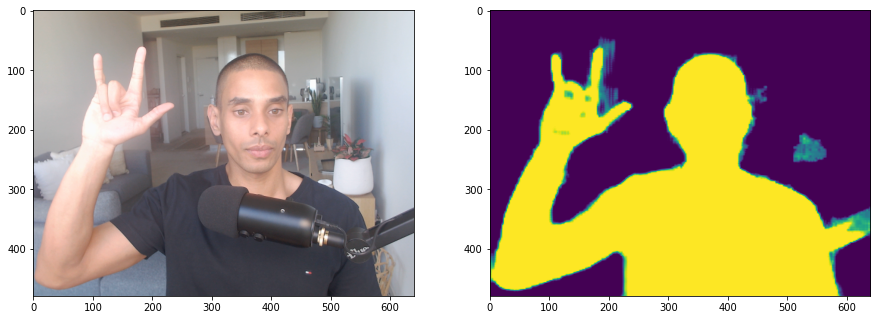

In [34]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

In [35]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 

In [ ]:
np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 

In [37]:
segmented_image = np.where(mask, frame, background)

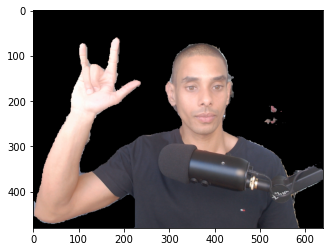

In [38]:
plt.imshow(segmented_image)

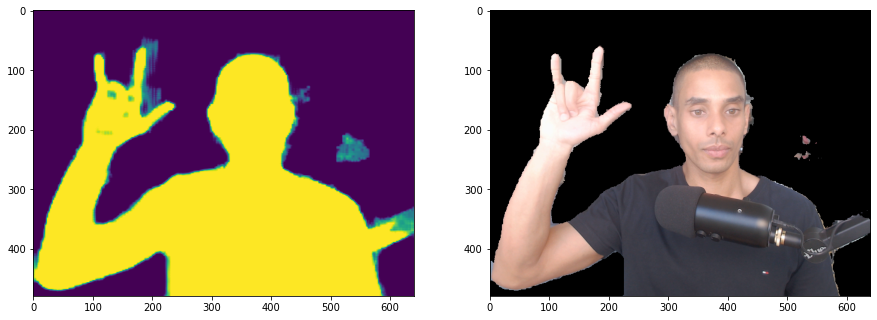

In [39]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [40]:
segmented_image = np.where(mask, frame, cv2.blur(frame, (40,40)))

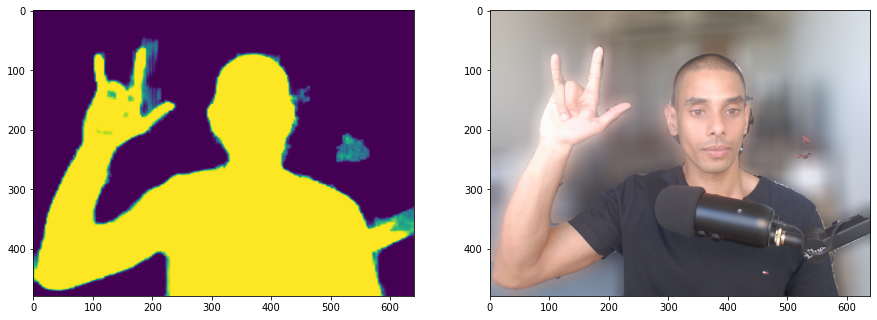

In [41]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

# 5. Gradio App

In [42]:
import gradio as gr

In [48]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

In [51]:
webcam = gr.inputs.Image(shape=(640, 480), source="webcam")

In [52]:
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

In [ ]:
webapp.launch()